In [ ]:
from google.colab import drive
import keras
from keras import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

sns.set()

In [ ]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
pd.options.display.max_rows=100

In [ ]:
train = pd.read_csv('/gdrive/My Drive/Titanic/train.csv')
test = pd.read_csv('/gdrive/My Drive/Titanic/test.csv')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **NaN값 탐색**

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


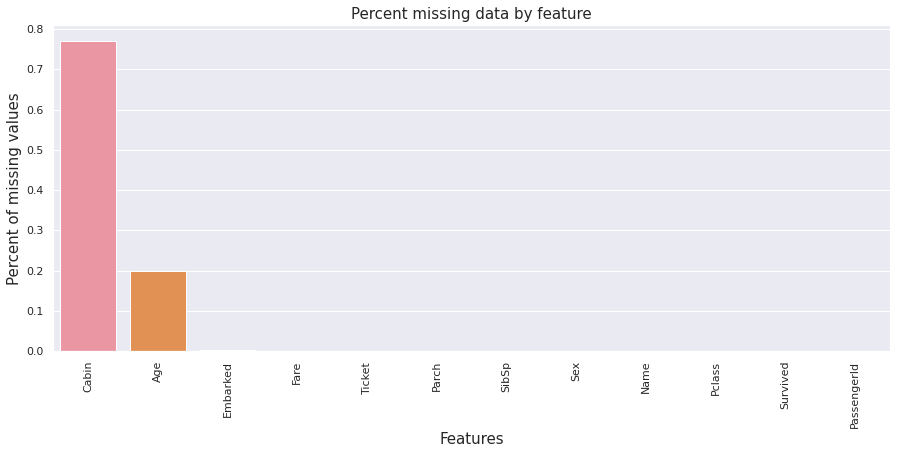

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


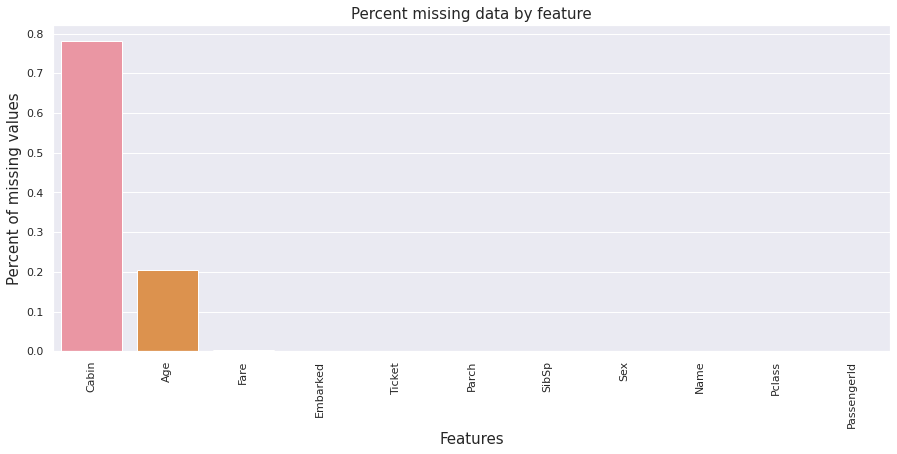

In [ ]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

# **Pclass & Sex 분석**

In [ ]:
def pie_chart(feature):
  feature_ratio = train[feature].value_counts(sort=False)
  feature_size = feature_ratio.size
  feature_index = feature_ratio.index
  survived = train[train['Survived'] == 1][feature].value_counts()
  dead = train[train['Survived'] == 0][feature].value_counts()    

  plt.plot(aspect='auto')
  plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
  plt.title(feature + '\'s ratio in total')
  plt.show()

  for i, index in enumerate(feature_index):
    plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
    plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
    plt.title(str(index) + '\'s ratio')

  plt.show()

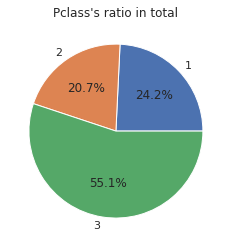

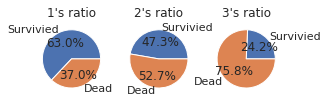

In [ ]:
pie_chart('Pclass')

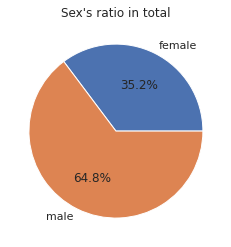

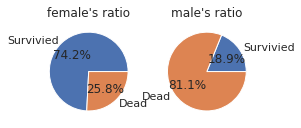

In [ ]:
pie_chart('Sex')

# **SibSp & Parch 분석**

In [ ]:
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked=True, figsize=(10,5))

In [ ]:
tmp_df = train

tmp_df["sum"] = tmp_df["SibSp"] + tmp_df["Parch"]

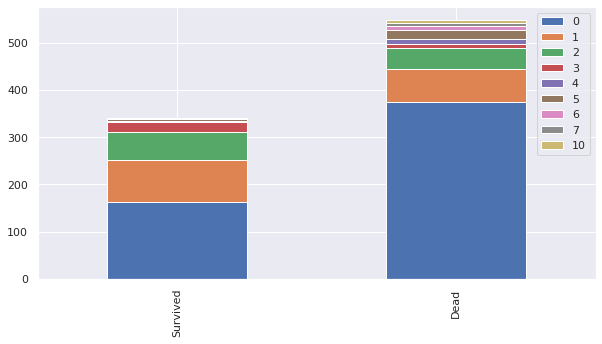

In [ ]:
survived = train[train['Survived']==1]["sum"].value_counts()
dead = train[train['Survived']==0]["sum"].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


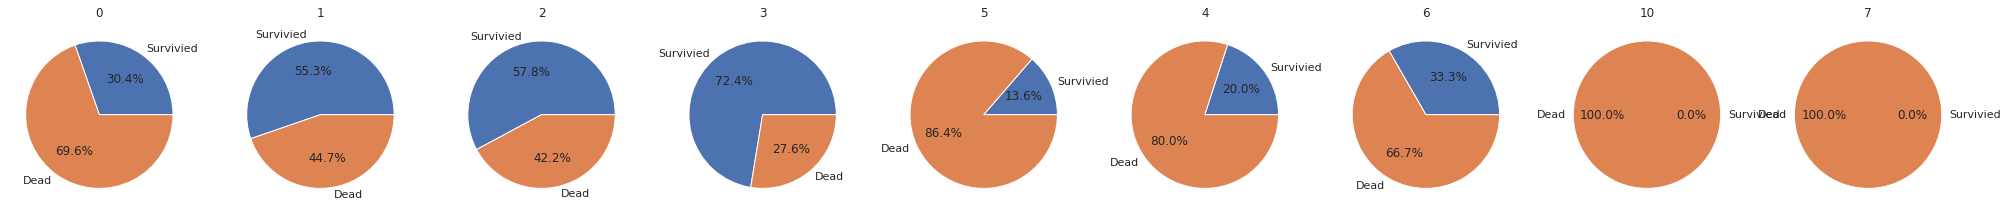

In [ ]:
sum = tmp_df["sum"].value_counts()

plt.figure(figsize=(35,5))
plt.plot(aspect='auto')
for index in range(len(sum.index)):
  plt.subplot(1, len(sum.index), index+1,  aspect='equal')
  survived = len(train[train['sum']==sum.index[index]][train['Survived']==1]["sum"])
  dead = len(train[train['sum']==sum.index[index]][train['Survived']==0]["sum"])
  plt.pie([survived, dead], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
  plt.title(sum.index[index])
plt.show()

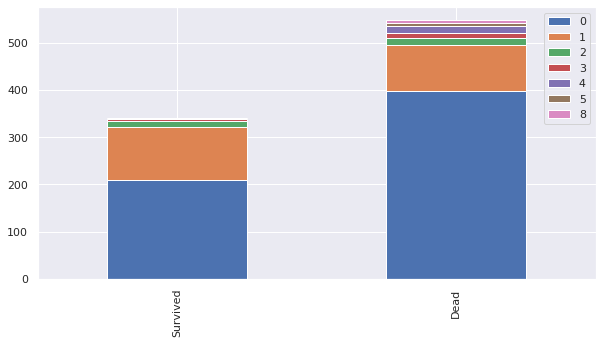

In [ ]:
bar_chart("SibSp")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


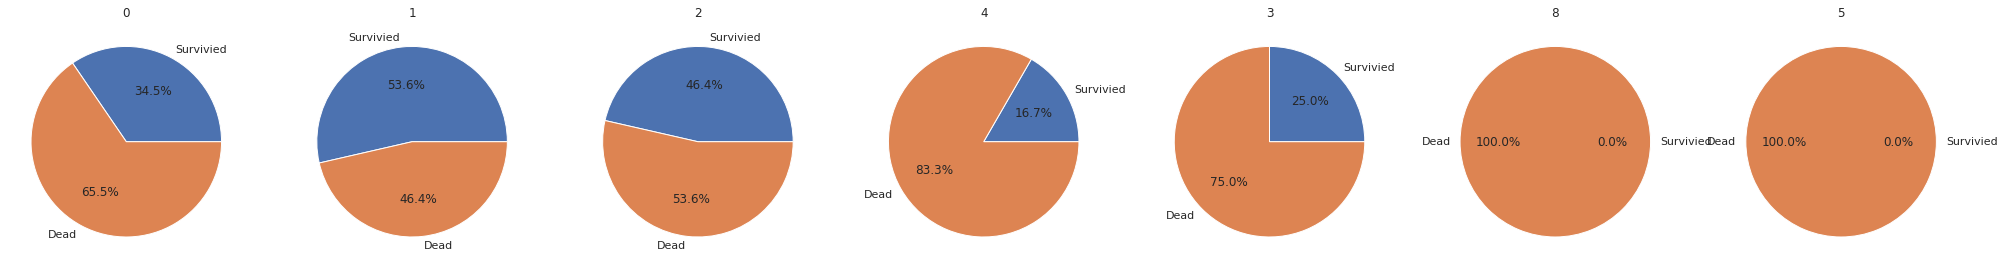

In [ ]:
SibSp = train["SibSp"].value_counts()

plt.figure(figsize=(35,5))
plt.plot(aspect='auto')
for index in range(len(SibSp.index)):
  plt.subplot(1, len(SibSp.index), index+1,  aspect='equal')
  survived = len(train[train['SibSp']==SibSp.index[index]][train['Survived']==1]["SibSp"])
  dead = len(train[train['SibSp']==SibSp.index[index]][train['Survived']==0]["SibSp"])
  plt.pie([survived, dead], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
  plt.title(SibSp.index[index])
plt.show()

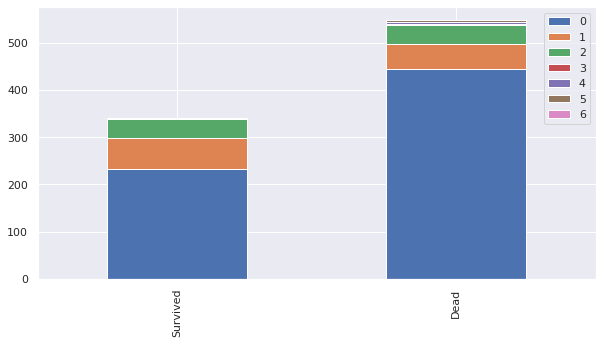

In [ ]:
bar_chart("Parch")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


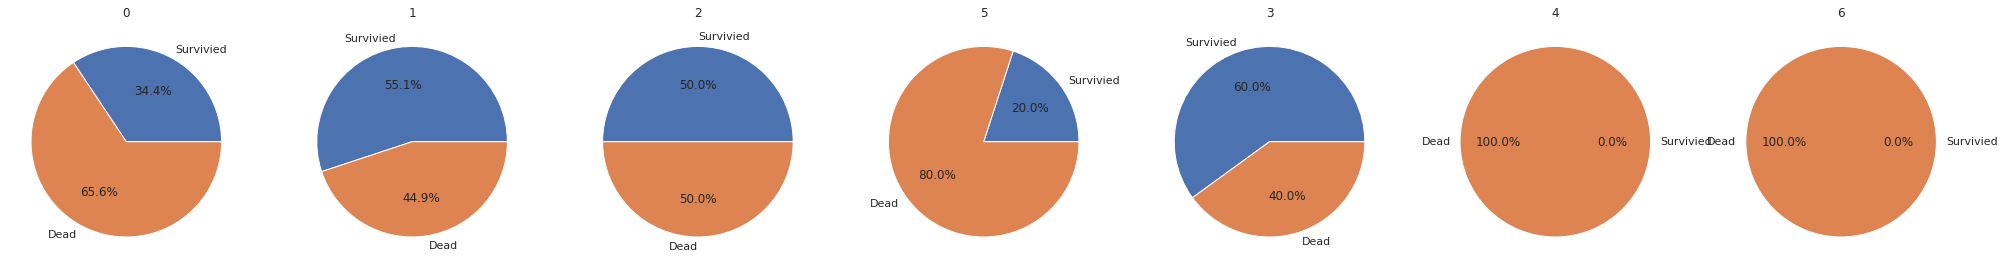

In [ ]:
Parch = train["Parch"].value_counts()

plt.figure(figsize=(35,5))
plt.plot(aspect='auto')
for index in range(len(Parch.index)):
  plt.subplot(1, len(Parch.index), index+1,  aspect='equal')
  survived = len(train[train['Parch']==Parch.index[index]][train['Survived']==1]["Parch"])
  dead = len(train[train['Parch']==Parch.index[index]][train['Survived']==0]["Parch"])
  plt.pie([survived, dead], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
  plt.title(Parch.index[index])
plt.show()

# **Ticket_Group 분석**

Index(['110152', '110413', '110465', '110564', '110813', '111240', '111320',
       '111361', '111369', '111426',
       ...
       'STON/O2. 3101290', 'SW/PP 751', 'W./C. 14258', 'W./C. 14263',
       'W./C. 6607', 'W./C. 6608', 'W./C. 6609', 'W.E.P. 5734', 'W/C 14208',
       'WE/P 5735'],
      dtype='object', length=681)
CA. 2343    7
347082      7
1601        7
3101295     6
CA 2144     6
           ..
349219      1
386525      1
34218       1
371060      1
349216      1
Name: Ticket, Length: 681, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


([<matplotlib.patches.Wedge at 0x7f91c9ebe940>,
 [Text(-0.45054941880696253, 1.0034964978577197, 'All_Dead'),
  Text(0.4505494188069624, -1.0034964978577199, 'Separate')],
 [Text(-0.24575422844016134, 0.5473617261042106, '63.4%'),
  Text(0.2457542284401613, -0.5473617261042107, '36.6%')])

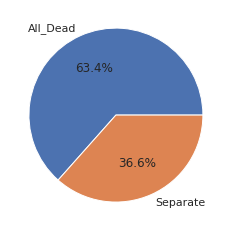

In [ ]:
Ticket_data = train["Ticket"].value_counts().sort_index()
Ticket_list = Ticket_data.index
print(Ticket_list)

Ticket_data_count = train["Ticket"].value_counts()
print(Ticket_data_count)

all_dead = 0
total = 0

for ticket_num in Ticket_list:
  survive = len(train[train["Survived"] == 1][train["Ticket"] == ticket_num])
  dead = len(train[train["Survived"] == 0][train["Ticket"] == ticket_num])
  if (survive + dead) != 1:
    total += 1
    if ((survive == 0) or (dead == 0)):
      all_dead += 1

plt.pie([all_dead, total - all_dead], labels=['All_Dead', 'Separate'], autopct='%1.1f%%')

# **Embarked_NaN 분석**

In [ ]:
Embarked_data = train[train["Embarked"].isnull() == True]

Embarked_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sum
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [ ]:
Ticket_data = train["Ticket"].value_counts().sort_index()
Ticket_list = Ticket_data.index
print(Ticket_list)

all_dead = 0
total = 0

for ticket_num in Ticket_list:
  Embarked_Ticket = train[train["Ticket"] == ticket_num]["Embarked"].value_counts()
  if len(Embarked_Ticket) == 1:
    continue
  print(Embarked_Ticket)

Index(['110152', '110413', '110465', '110564', '110813', '111240', '111320',
       '111361', '111369', '111426',
       ...
       'STON/O2. 3101290', 'SW/PP 751', 'W./C. 14258', 'W./C. 14263',
       'W./C. 6607', 'W./C. 6608', 'W./C. 6609', 'W.E.P. 5734', 'W/C 14208',
       'WE/P 5735'],
      dtype='object', length=681)
Series([], Name: Embarked, dtype: int64)
C    1
S    1
Name: Embarked, dtype: int64
C    2
S    1
Name: Embarked, dtype: int64


In [ ]:
train_and_test = [train, test]

for dataset in train_and_test:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')
  dataset['Embarked'] = dataset['Embarked'].astype(str)

# **Pclass & Fare 분석**

In [ ]:
Fare_data = test[test["Fare"].isnull() == True]

Fare_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
male_train = train[train["Sex"]=="male"]
third_Pclass_train = male_train[male_train["Pclass"] == 3]
target_pd_train = third_Pclass_train.loc[third_Pclass_train['Age']>44]

target_pd_train["Fare"].mean()

7.180641176470588

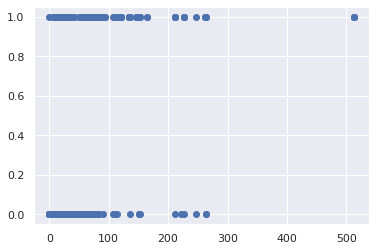

In [ ]:
x = train['Fare']
y = train['Survived']

plt.scatter(x,y)

# **Age 유무**

In [ ]:
train.loc[train['Age'].isnull()==True,'Age_Nan'] = True
train.loc[train['Age'].isnull()==False,'Age_Nan'] = False

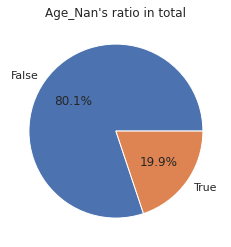

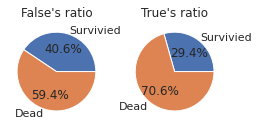

In [ ]:
pie_chart('Age_Nan')

# **Cabin NaN**

In [ ]:
train.loc[train['Cabin'].isnull()==True,'Cabin_Nan'] = True
train.loc[train['Cabin'].isnull()==False,'Cabin_Nan'] = False

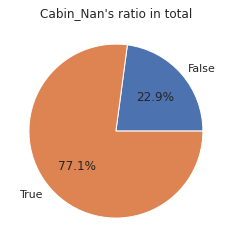

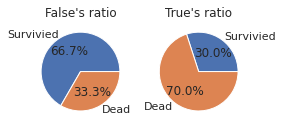

In [ ]:
pie_chart('Cabin_Nan')

# **Fname**

In [ ]:
train['Fname'] = train['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
Name_data = train['Fname'].value_counts().sort_index()

Name_data

Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
Name: Fname, dtype: int64

In [ ]:
test['Fname'] = test['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
Name_data_test = test['Fname'].value_counts().sort_index()

Name_data_test

Col         2
Dona        1
Dr          1
Master     21
Miss       78
Mr        240
Mrs        72
Ms          1
Rev         2
Name: Fname, dtype: int64

In [ ]:
pd.crosstab(train.Fname,train.Sex).T.style.background_gradient(cmap='summer_r')

Fname,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


In [ ]:
train.loc[796,"Fname"] = "Mrs"

In [ ]:
train['Fname'].replace(['Capt','Col','Don','Dr','Jonkheer','Lady','Major','Master','Miss','Mlle','Mme','Mr','Mrs','Ms','Rev','Sir','the Countess'],
                      ['Mr','Mr','Mr','Mr','Mr','Mrs','Mr','Master','Miss','Miss','Miss','Mr','Mrs','Miss','Mr','Mr','Mrs'],inplace=True)

In [ ]:
pd.crosstab(train.Fname,train.Sex).T.style.background_gradient(cmap='summer_r')

Fname,Master,Miss,Mr,Mrs
Sex,,,,
female,0,186,0,128
male,40,0,537,0


In [ ]:
pd.crosstab(test.Fname,test.Sex).T.style.background_gradient(cmap='summer_r')

Fname,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [ ]:
test['Fname'].replace(['Col','Dona','Dr','Master','Miss','Mr','Mrs','Ms','Rev'],
                      ['Mr','Mrs','Mr','Master','Miss','Mr','Mrs','Miss','Mr'],inplace=True)

In [ ]:
pd.crosstab(test.Fname,test.Sex).T.style.background_gradient(cmap='summer_r')

Fname,Master,Miss,Mr,Mrs
Sex,,,,
female,0,79,0,73
male,21,0,245,0


In [ ]:
all_data = pd.concat(train_and_test)

In [ ]:
all_data.groupby('Fname')['Age'].mean()

Fname
Master     5.482642
Miss      21.834533
Mr        32.784298
Mrs       37.114943
Name: Age, dtype: float64

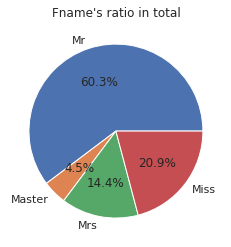

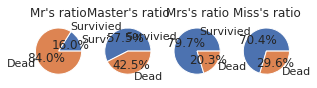

In [ ]:
pie_chart('Fname')

# **Fill_Age**

In [ ]:
for dataset in train_and_test:
  dataset.loc[(dataset.Age.isnull())&(dataset.Fname=='Master'),'Age']=5.482642
  dataset.loc[(dataset.Age.isnull())&(dataset.Fname=='Miss'),'Age']=21.834533
  dataset.loc[(dataset.Age.isnull())&(dataset.Fname=='Mr'),'Age']=32.784298
  dataset.loc[(dataset.Age.isnull())&(dataset.Fname=='Mrs'),'Age']=37.114943

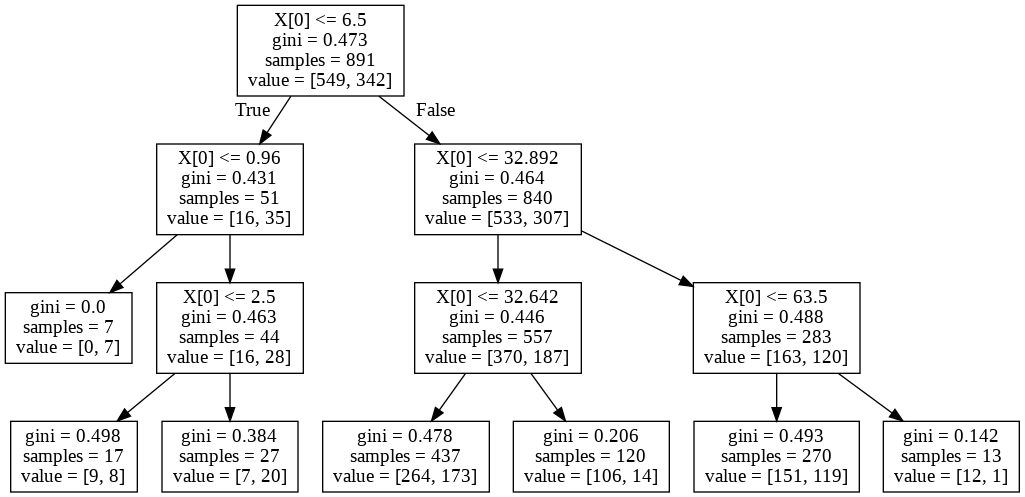

In [ ]:
X = train["Age"].values.reshape(-1, 1)
Y = train["Survived"].values.reshape(-1, 1)
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, Y)

dot_data = export_graphviz(clf)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
Age_length = pd.qcut(train.Age, 8)

Age_length

0      (21.835, 25.0]
1        (36.0, 45.0]
2        (25.0, 30.0]
3      (32.784, 36.0]
4      (32.784, 36.0]
            ...      
886      (25.0, 30.0]
887    (17.0, 21.835]
888    (17.0, 21.835]
889      (25.0, 30.0]
890    (30.0, 32.784]
Name: Age, Length: 891, dtype: category
Categories (8, interval[float64]): [(0.419, 17.0] < (17.0, 21.835] < (21.835, 25.0] < (25.0, 30.0] <
                                    (30.0, 32.784] < (32.784, 36.0] < (36.0, 45.0] < (45.0, 80.0]]

In [ ]:
for dataset in train_and_test:
    dataset.loc[dataset['Age'] <= 17.0, 'AgePoint'] = 0
    dataset.loc[(dataset['Age'] > 17.0) & (dataset['Age'] <= 21.835), 'AgePoint'] = 1
    dataset.loc[(dataset['Age'] > 21.835) & (dataset['Age'] <= 25.0), 'AgePoint'] = 2
    dataset.loc[(dataset['Age'] > 25.0) & (dataset['Age'] <= 30.0), 'AgePoint'] = 3
    dataset.loc[(dataset['Age'] > 30.0) & (dataset['Age'] <= 32.784), 'AgePoint'] = 4
    dataset.loc[(dataset['Age'] > 32.784) & (dataset['Age'] <= 36.0), 'AgePoint'] = 5
    dataset.loc[(dataset['Age'] > 36.0) & (dataset['Age'] <= 45.0), 'AgePoint'] = 6
    dataset.loc[dataset['Age'] > 45.0, 'AgePoint'] = 7

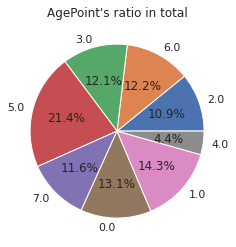

In [ ]:
feature_ratio = train['AgePoint'].value_counts(sort=False)
feature_size = feature_ratio.size
feature_index = feature_ratio.index
survived = train[train['Survived'] == 1]['AgePoint'].value_counts()
dead = train[train['Survived'] == 0]['AgePoint'].value_counts()    

plt.plot(aspect='auto')
plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
plt.title('AgePoint' + '\'s ratio in total')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


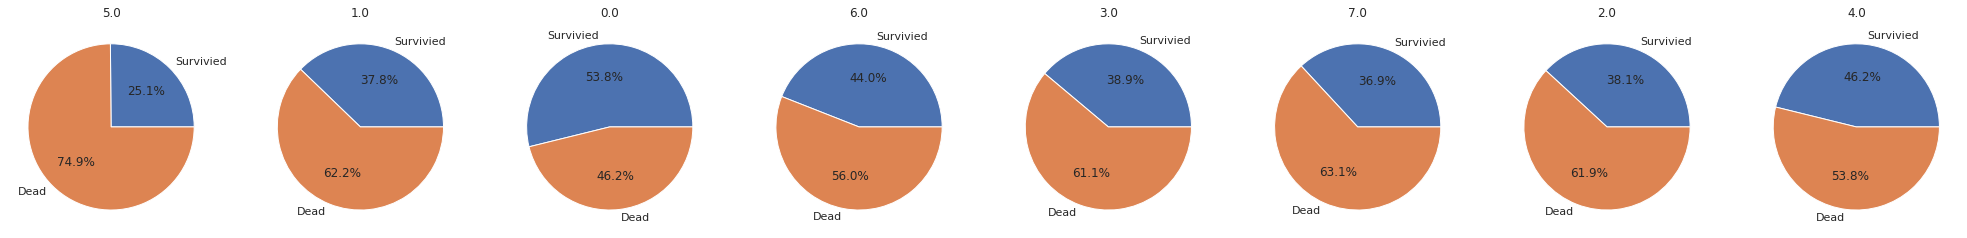

In [ ]:
AgePoint = train["AgePoint"].value_counts()

plt.figure(figsize=(35,5))
plt.plot(aspect='auto')
for index in range(len(AgePoint.index)):
  plt.subplot(1, len(AgePoint.index), index+1,  aspect='equal')
  survived = len(train[train['AgePoint']==AgePoint.index[index]][train['Survived']==1]["AgePoint"])
  dead = len(train[train['AgePoint']==AgePoint.index[index]][train['Survived']==0]["AgePoint"])
  plt.pie([survived, dead], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
  plt.title(AgePoint.index[index])
plt.show()

# **Cabin**

In [ ]:
Cabin_data = train["Cabin"].value_counts()

Cabin_data

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
              ..
E49            1
D15            1
T              1
D37            1
A5             1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
for dataset in train_and_test:
  dataset['Cabin'] = dataset['Cabin'].fillna('U')
  dataset['Cabin'] = dataset['Cabin'].astype(str)

In [ ]:
for dataset in train_and_test:
    dataset['CabinAlpha'] = dataset['Cabin'].str[:1]

In [ ]:
CabinAlpha_data = train["CabinAlpha"].value_counts()

CabinAlpha_data

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinAlpha, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


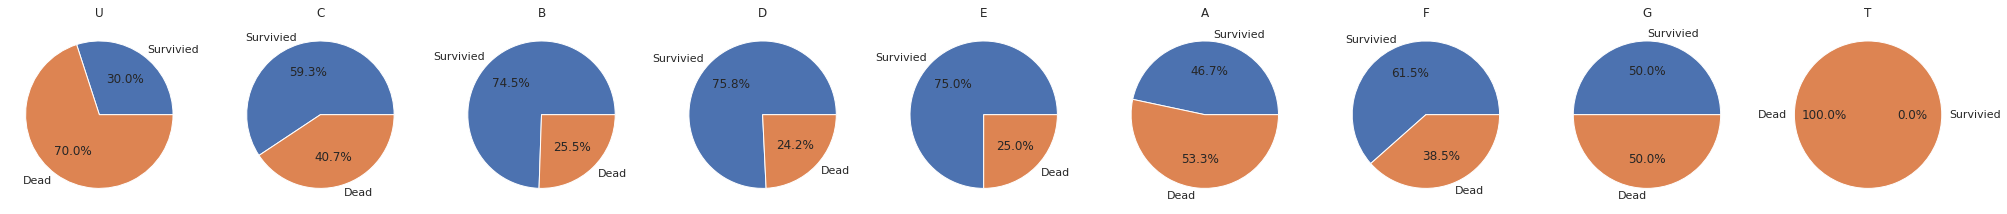

In [ ]:
CabinAlpha = train["CabinAlpha"].value_counts()

plt.figure(figsize=(35,5))
plt.plot(aspect='auto')
for index in range(len(CabinAlpha.index)):
  plt.subplot(1, len(CabinAlpha.index), index+1,  aspect='equal')
  survived = len(train[train['CabinAlpha']==CabinAlpha.index[index]][train['Survived']==1]["CabinAlpha"])
  dead = len(train[train['CabinAlpha']==CabinAlpha.index[index]][train['Survived']==0]["CabinAlpha"])
  plt.pie([survived, dead], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
  plt.title(CabinAlpha.index[index])
plt.show()

In [ ]:
all_data = pd.concat(train_and_test)

In [ ]:
Ticket_data = all_data["Ticket"].value_counts().sort_index()
Ticket_list = Ticket_data.index.tolist()
for Ticket_number in Ticket_list:
  for dataset in train_and_test:
    dataset.loc[(dataset.Ticket==Ticket_number),'Ticket_Group']=Ticket_list.index(Ticket_number)

In [ ]:
all_data = pd.concat(train_and_test)

In [ ]:
Ticket_data = all_data["Ticket_Group"].value_counts()
for Group_Number in range(len(Ticket_data)):
  for dataset in train_and_test:
    Ticket_Memeber = dataset.loc[(dataset.Ticket_Group==Group_Number)]
    Cabin_list = Ticket_Memeber["CabinAlpha"].value_counts().sort_index()
    if len(Cabin_list) > 1:
      dataset.loc[(dataset.Ticket_Group==Group_Number),"CabinAlpha"]=Cabin_list.index[0]

In [ ]:
all_data = pd.concat(train_and_test)
pd.crosstab(all_data.Ticket_Group,all_data.CabinAlpha).T.style.background_gradient(cmap='summer_r')

Output hidden; open in https://colab.research.google.com to view.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


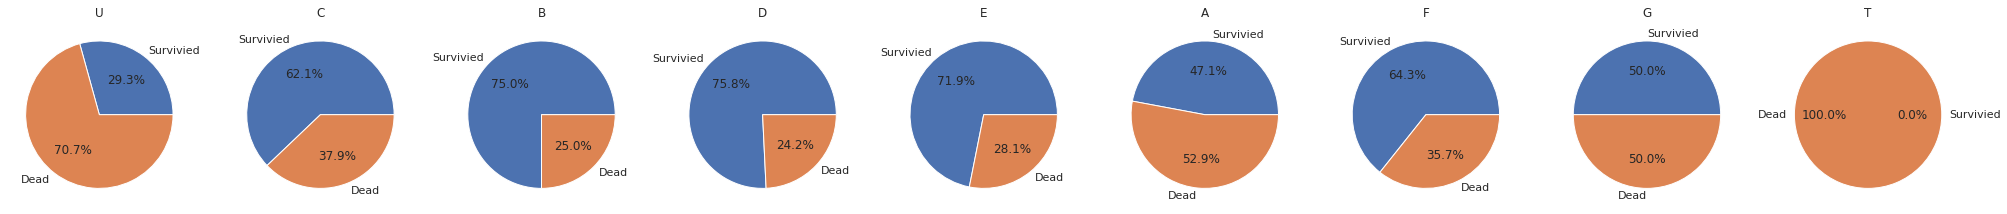

In [ ]:
CabinAlpha = train["CabinAlpha"].value_counts()

plt.figure(figsize=(35,5))
plt.plot(aspect='auto')
for index in range(len(CabinAlpha.index)):
  plt.subplot(1, len(CabinAlpha.index), index+1,  aspect='equal')
  survived = len(train[train['CabinAlpha']==CabinAlpha.index[index]][train['Survived']==1]["CabinAlpha"])
  dead = len(train[train['CabinAlpha']==CabinAlpha.index[index]][train['Survived']==0]["CabinAlpha"])
  plt.pie([survived, dead], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
  plt.title(CabinAlpha.index[index])
plt.show()

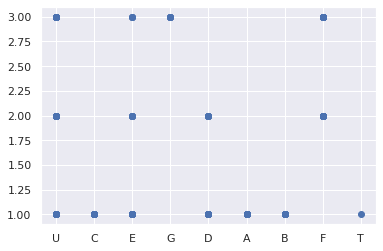

In [ ]:
x = all_data['CabinAlpha']
y = all_data['Pclass']

plt.scatter(x,y)

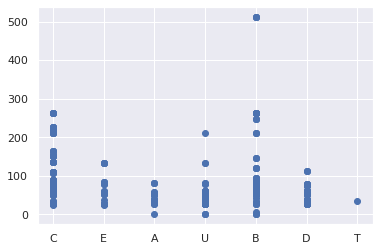

In [ ]:
x = all_data[all_data['Pclass']==1]['CabinAlpha']
y = all_data[all_data['Pclass']==1]['Fare']

plt.scatter(x,y)

In [ ]:
all_data[all_data['Pclass']==1]['CabinAlpha'].value_counts()

C    103
B     67
U     55
D     40
E     33
A     24
T      1
Name: CabinAlpha, dtype: int64

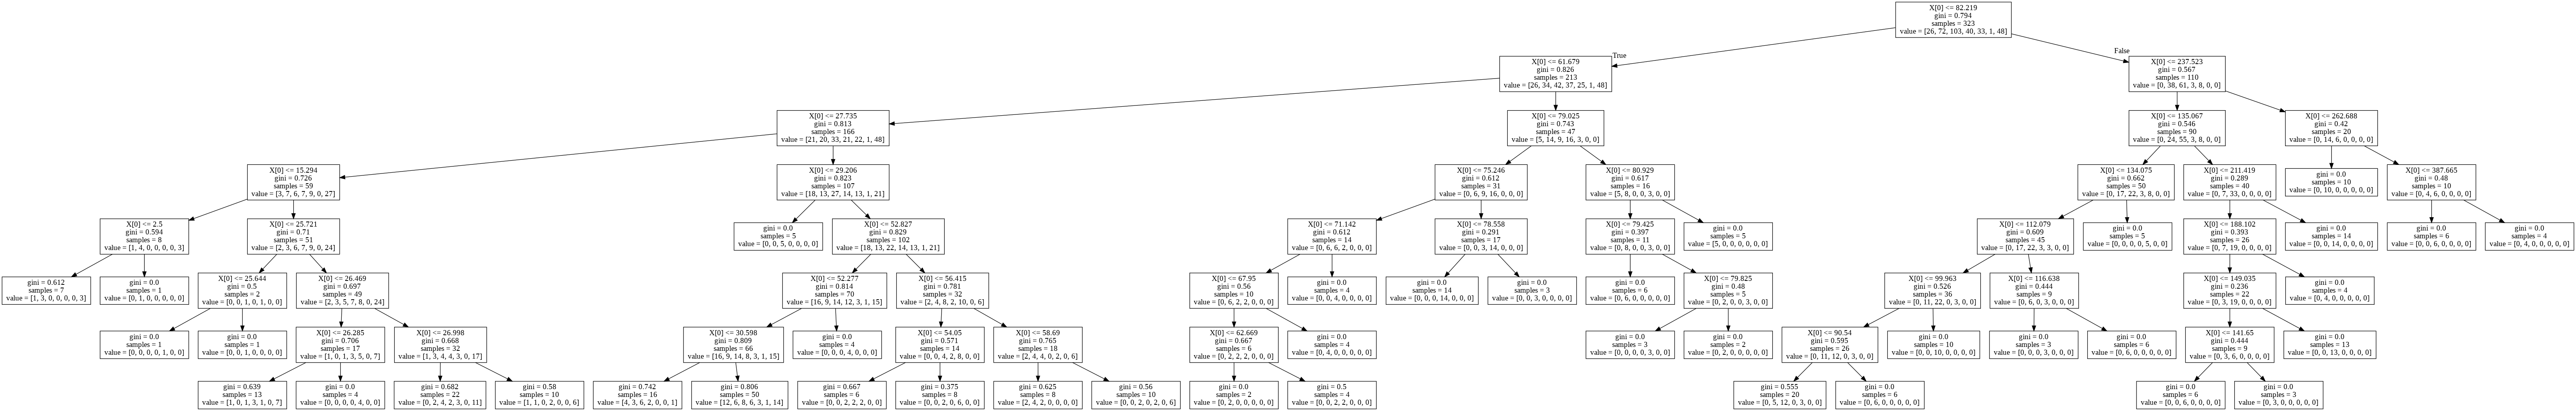

In [ ]:
X = all_data[all_data['Pclass']==1]['Fare'].values.reshape(-1, 1)
Y = all_data[all_data['Pclass']==1]['CabinAlpha'].values.reshape(-1, 1)
clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X, Y)

dot_data = export_graphviz(clf)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

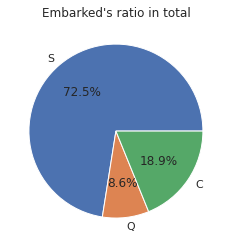

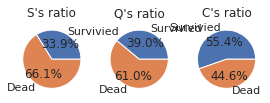

In [ ]:
pie_chart('Embarked')

In [ ]:
all_data.loc[all_data['Embarked']=='C','Embarked'] = 2
all_data.loc[all_data['Embarked']=='Q','Embarked'] = 1
all_data.loc[all_data['Embarked']=='S','Embarked'] = 0

In [ ]:
dataset.loc[dataset.CabinAlpha=='C','CabinAlpha'] = 3
dataset.loc[dataset.CabinAlpha=='B','CabinAlpha'] = 6
dataset.loc[dataset.CabinAlpha=='D','CabinAlpha'] = 7
dataset.loc[dataset.CabinAlpha=='E','CabinAlpha'] = 5
dataset.loc[dataset.CabinAlpha=='A','CabinAlpha'] = 1
dataset.loc[dataset.CabinAlpha=='F','CabinAlpha'] = 4
dataset.loc[dataset.CabinAlpha=='G','CabinAlpha'] = 2
dataset.loc[dataset.CabinAlpha=='T','CabinAlpha'] = 0

In [ ]:
all_data['Fare'] = StandardScaler().fit_transform(all_data['Fare'].values.reshape(-1, 1))
all_data['Pclass'] = StandardScaler().fit_transform(all_data['Pclass'].values.reshape(-1, 1))
all_data['Embarked'] = StandardScaler().fit_transform(all_data['Embarked'].values.reshape(-1, 1))

train_data = all_data[all_data['CabinAlpha'] != 'U'][['Fare', 'Pclass', 'Embarked']]
target = all_data[all_data['CabinAlpha'] != 'U']['CabinAlpha']

target

1      C
3      C
6      E
10     G
11     C
      ..
404    D
405    D
407    C
411    C
414    C
Name: CabinAlpha, Length: 316, dtype: object